<a href="https://colab.research.google.com/github/M2203114/Python_AI/blob/fall2024/02_lab_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Попов Е.Б. БИВТ-22-СП-4

# 1. Название датасета

Датасет называется "winequality-red.csv".

# 2. Постановка задачи

Датасет winequality-red.csv содержит информацию о характеристиках красного вина, таких как кислотность, содержание сахара, алкоголя и другие параметры. Целевой переменной является quality, которая представляет собой оценку качества вина по шкале от 0 до 10.


__________________________________________________________________________________
**Задача заключается в построении модели, которая будет предсказывать качество вина на основе его физико-химических свойств.**


__________________________________________________________________________________
**Целевая переменная quality является дискретной, так как она принимает значения от 0 до 10.**

Переменные:

fixed acidity (фиксированная кислотность)

volatile acidity (летучая кислотность)

citric acid (лимонная кислота)

residual sugar (остаточный сахар)

chlorides (хлориды)

free sulfur dioxide (свободный диоксид серы)

total sulfur dioxide (общий диоксид серы)

density (плотность)

pH (уровень pH)

sulphates (сульфаты)

alcohol (алкоголь)

quality (качество) — целевая переменная

# 3. Распределение целевой переменной

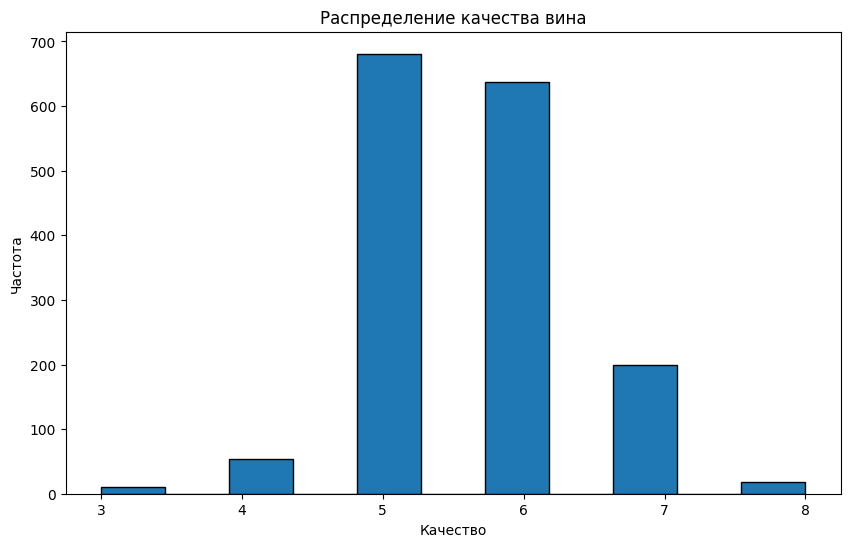

Количество уникальных значений целевой переменной: 6


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('winequality-red.csv')


plt.figure(figsize=(10, 6))
plt.hist(data['quality'], bins=11, edgecolor='black')
plt.title('Распределение качества вина')
plt.xlabel('Качество')
plt.ylabel('Частота')
plt.show()


unique_values = data['quality'].nunique()
print(f"Количество уникальных значений целевой переменной: {unique_values}")

# 4. Основные статистики по переменным

In [3]:

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 5. Основная информация по датасету

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 6. Количество пропусков#



In [5]:
a = data.isnull().sum()
print(a)
if(a.sum() == 0):
    print("В датасете нет пропусков.")


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
В датасете нет пропусков.


# 7. Гистограммы 5 любых признаков

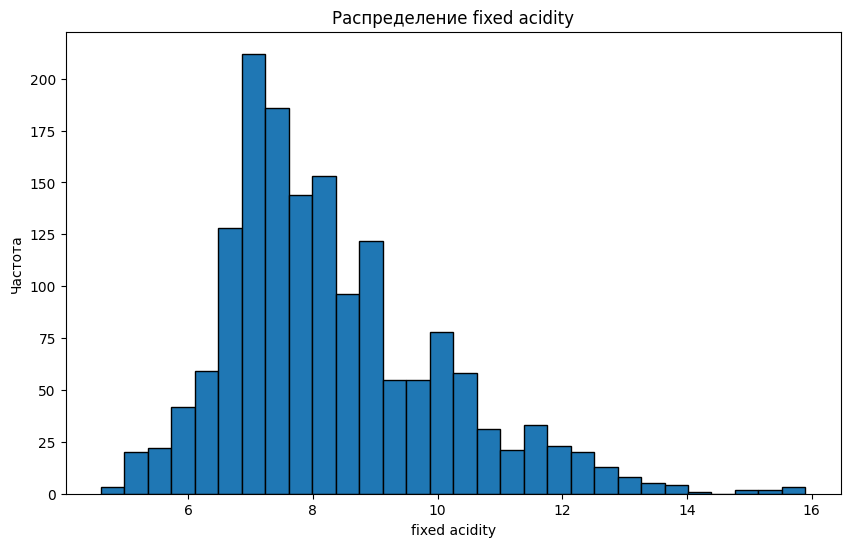

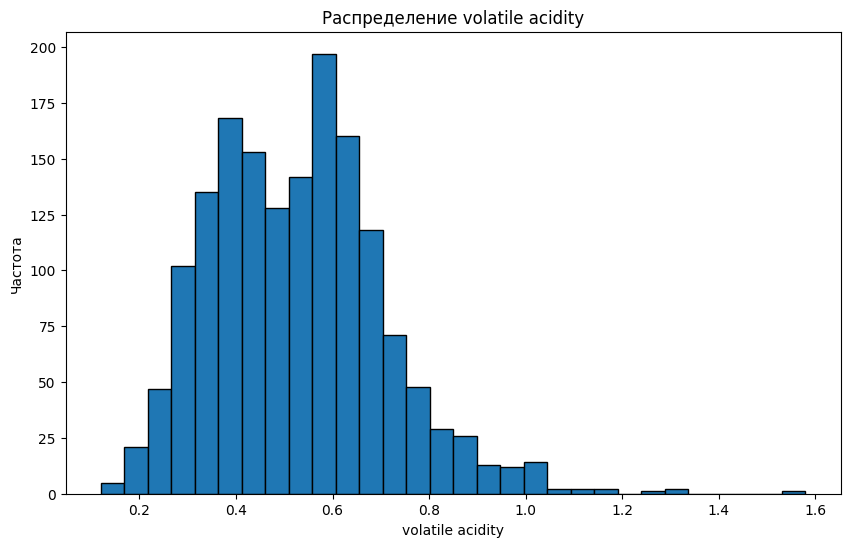

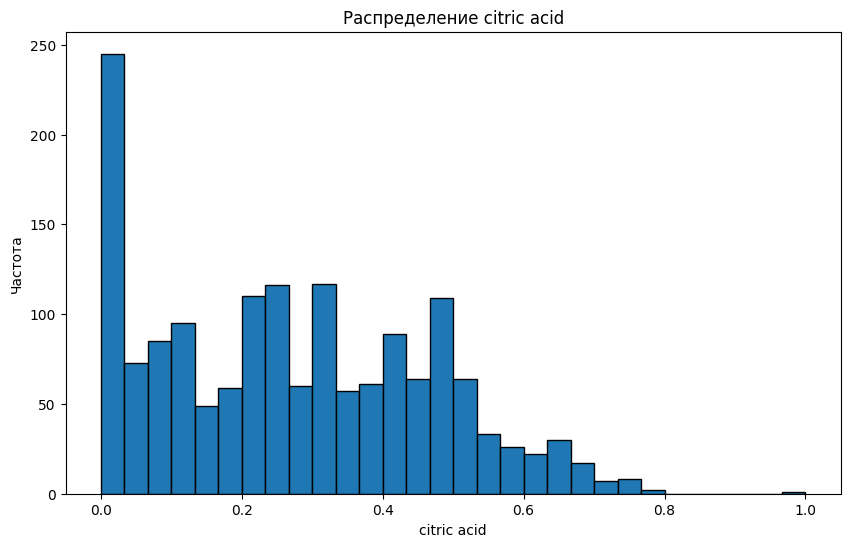

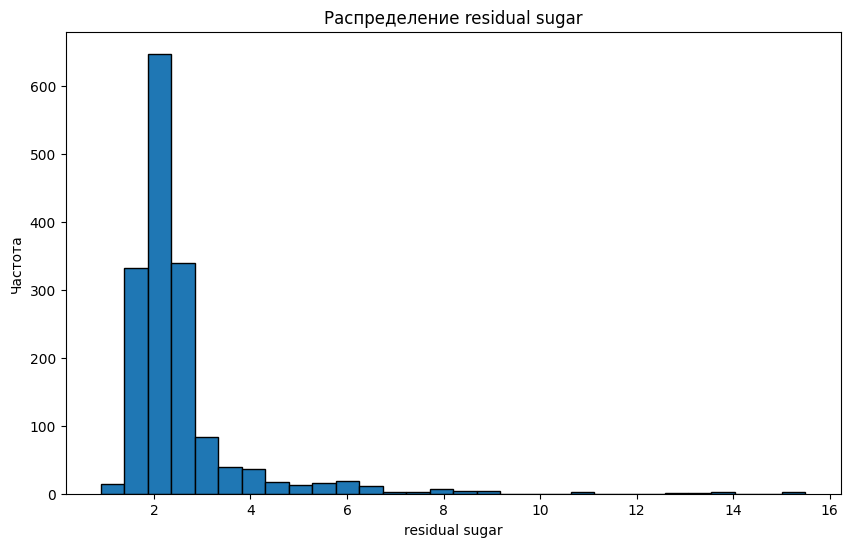

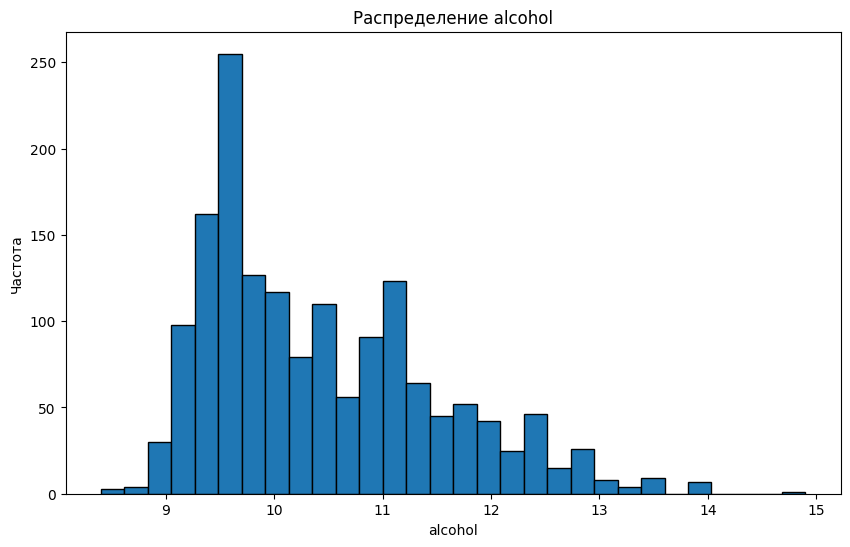

In [6]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol']

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.hist(data[feature], bins=30, edgecolor='black')
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

*   ***fixed acidity:*** Распределение смещено в сторону меньших значений.
*   ***volatile acidity:*** Распределение также смещено в сторону меньших значений, но имеет более широкий диапазон.

*   ***citric acid:*** Распределение имеет пик около нуля, что указывает на наличие множества вин без лимонной кислоты.
*   ***residual sugar:*** Распределение смещено в сторону меньших значений, но имеет длинный хвост в сторону больших значений.

*   ***alcohol:*** Распределение смещено в сторону меньших значений, но имеет более симметричный вид по сравнению с другими признаками.


# 8. Графики зависимости переменных от целевой переменной

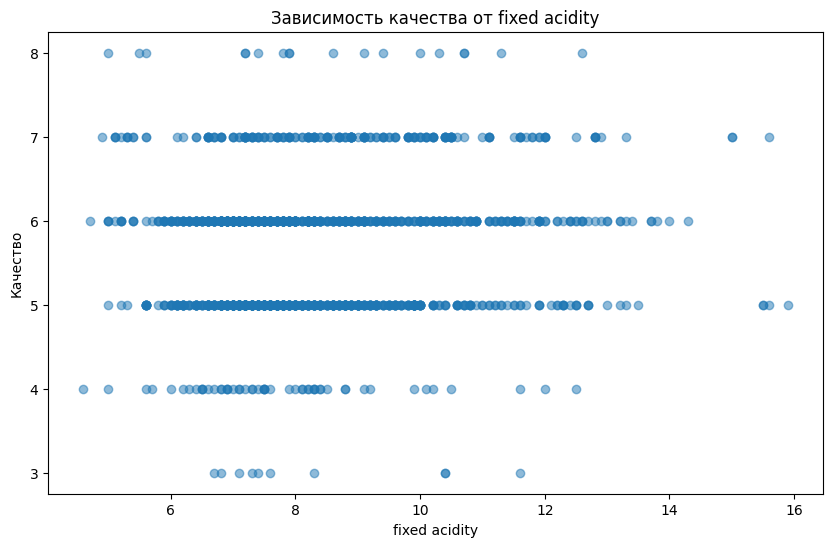

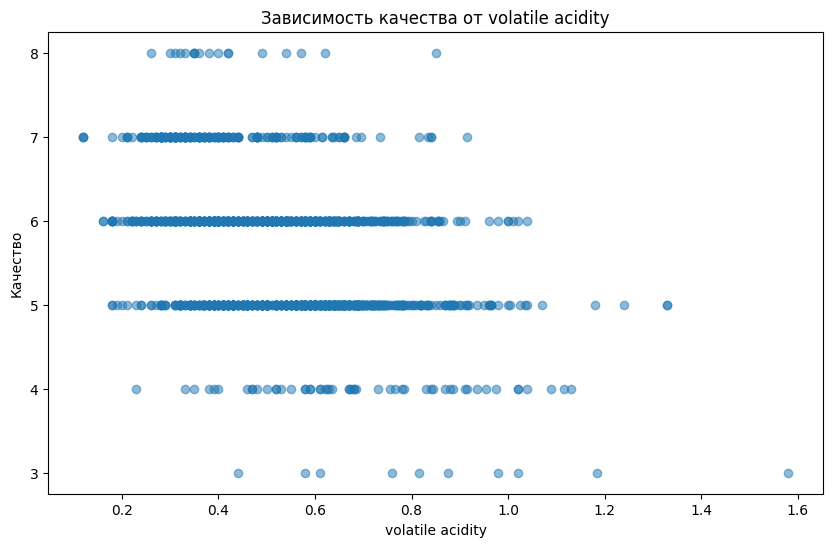

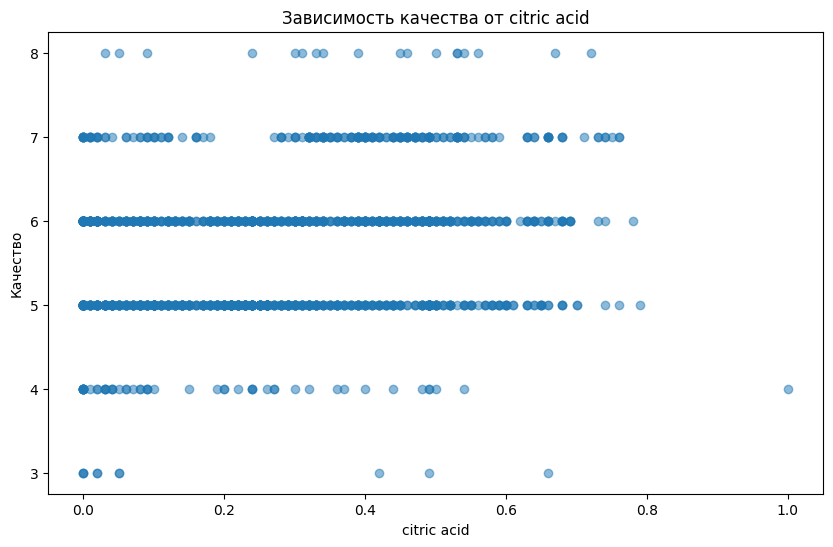

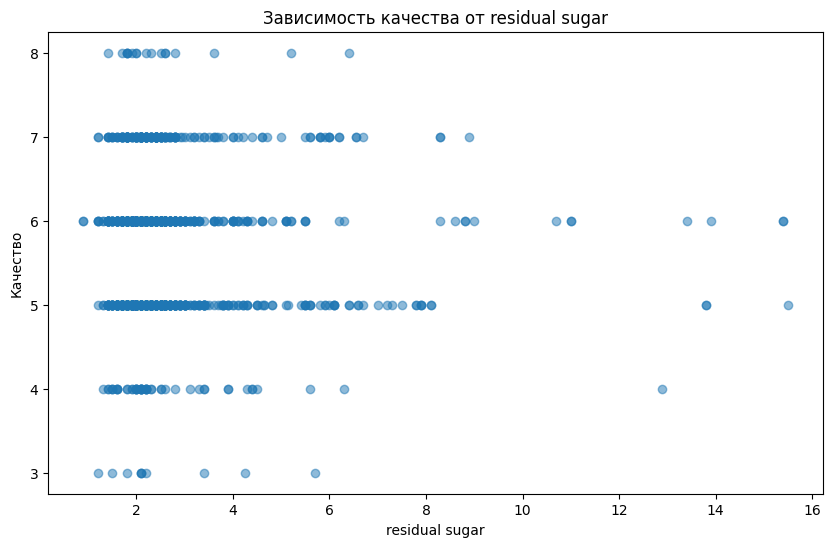

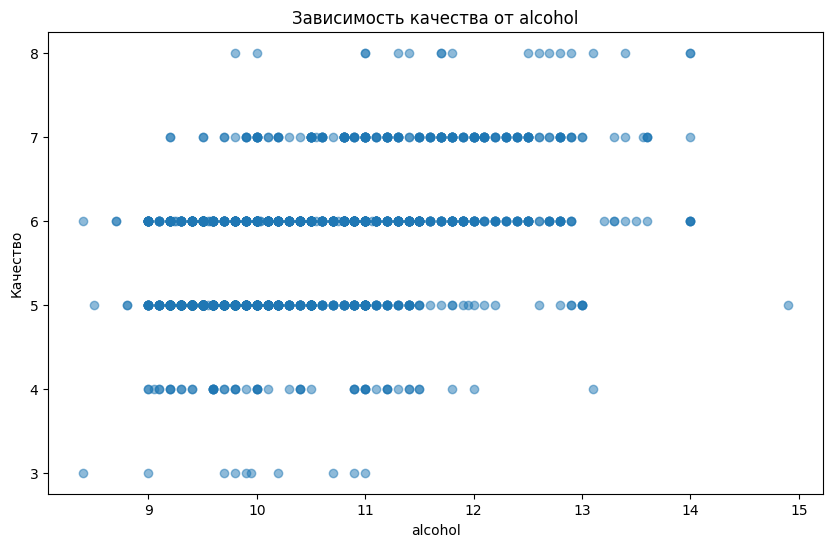

In [7]:
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[feature], data['quality'], alpha=0.5)
    plt.title(f'Зависимость качества от {feature}')
    plt.xlabel(feature)
    plt.ylabel('Качество')
    plt.show()


Выводы:
* ***Fixed Acidity (Фиксированная кислотность):*** На графике видно, что нет четкой линейной зависимости между фиксированной кислотностью и качеством вина. Однако можно заметить, что вина с более высоким качеством (6-8) имеют более широкий диапазон значений фиксированной кислотности.

* ***Volatile Acidity (Летучая кислотность): ***Здесь наблюдается обратная зависимость: чем ниже летучая кислотность, тем выше качество вина. Вина с качеством 5 и ниже имеют более высокие значения летучей кислотности.

* ***Citric Acid (Лимонная кислота):*** Лимонная кислота, как и фиксированная кислотность, не показывает четкой линейной зависимости с качеством. Однако вина с более высоким качеством имеют более широкий диапазон значений лимонной кислоты.

* ***Residual Sugar (Остаточный сахар):*** Зависимость между остаточным сахаром и качеством вина также не является линейной. Вина с более высоким качеством могут иметь как низкие, так и высокие значения остаточного сахара.

* ***Alcohol (Алкоголь):*** Наиболее четкая зависимость наблюдается между содержанием алкоголя и качеством вина. Вина с более высоким содержанием алкоголя, как правило, имеют более высокое качество.

Заключение:

**Из всех рассмотренных переменных наиболее сильная зависимость наблюдается между содержанием алкоголя и летучей кислотностью. Переменные volatile acidity и alcohol могут быть использованы для прогнозирования качества вина, так как они показывают более четкую взаимосвязь с целевой переменной. Переменные fixed acidity, citric acid и residual sugar имеют слабую взаимосвязь с качеством вина и будут менее полезны для прогнозирования.**










# EXTRA Зависимость двух переменных одновременно от целевой переменной:

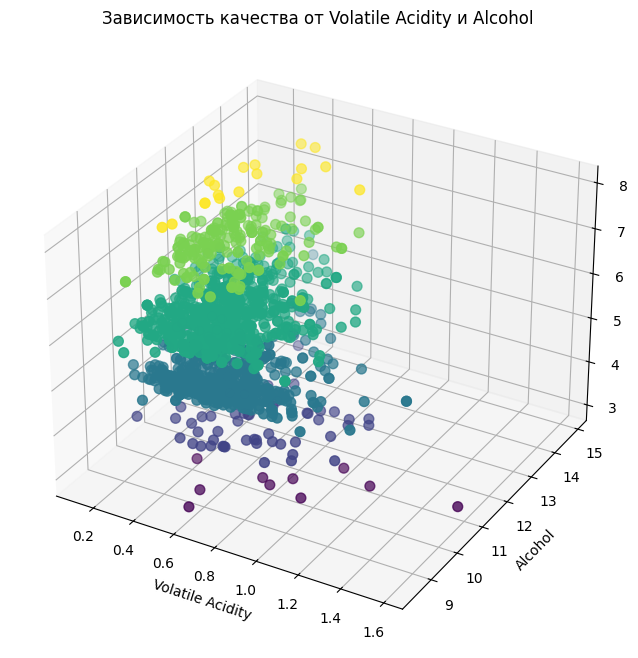

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['volatile acidity'], data['alcohol'], data['quality'], c=data['quality'], cmap='viridis', s=50)
ax.set_xlabel('Volatile Acidity')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Quality')
plt.title('Зависимость качества от Volatile Acidity и Alcohol')
plt.show()

#Зависимость качества от "alcohol":

*   ***Высокий уровень алкоголя:*** Вина с высоким содержанием алкоголя (более 11%) чаще имеют более высокое качество (более светлые точки на графике).
*   ***Средний уровень алкоголя:*** Вина со средним содержанием алкоголя (от 9% до 11%) демонстрируют разное качество, что также указывает на влияние других факторов.
*   ***Низкий уровень алкоголя:*** Вина с низким содержанием алкоголя (менее 9%) обычно имеют более низкое качество (более темные точки на графике).









#Зависимость качества от "volatile acidity":

*   Высокая летучая кислотность: Вина с высоким уровнем "volatile acidity" (более 0.6) обычно имеют более низкое качество (более темные точки на графике).
*   Средняя летучая кислотность: Вина со средним уровнем "volatile acidity" (от 0.4 до 0.6) демонстрируют разное качество, что указывает на то, что другие факторы, такие как "alcohol", также играют важную роль.
*   Низкая летучая кислотность: Вина с низким уровнем "volatile acidity" (менее 0.4) чаще имеют более высокое качество (более светлые точки на графике).










# Выводы:

*   Низкая  летучая кислотность и высокий уровень алкоголя чаще всего связаны с более высоким качеством вина.
*   Средние значения летучая кислотность и "alcohol" могут приводить к разному качеству, что указывает на необходимость учета других факторов для более точного предсказания качества.
*  Высокая летучая кислотность и низкий уровень алкоголя чаще всего связаны с более низким качеством вина.







